In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

import os,glob

In [2]:
project_dir = os.getcwd()
data_dir = os.path.join(project_dir, 'data')

data_csv = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_csv = pd.read_csv(os.path.join(data_dir, 'test.csv'))


data_csv = data_csv.drop(columns=['id'])
test_csv = test_csv.drop(columns=['id'])

In [48]:
data_csv.columns.size

25

In [3]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total         

In [5]:
from sklearn.utils import resample

positive = data_csv[data_csv['diagnosed_diabetes'] == 1]
negative = data_csv[data_csv['diagnosed_diabetes'] == 0]

down_sampling = resample(positive, replace=False, n_samples=len(negative), random_state=8964)
data_csv = pd.concat([down_sampling, negative])
data_csv['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1.0    263693
0.0    263693
Name: count, dtype: int64

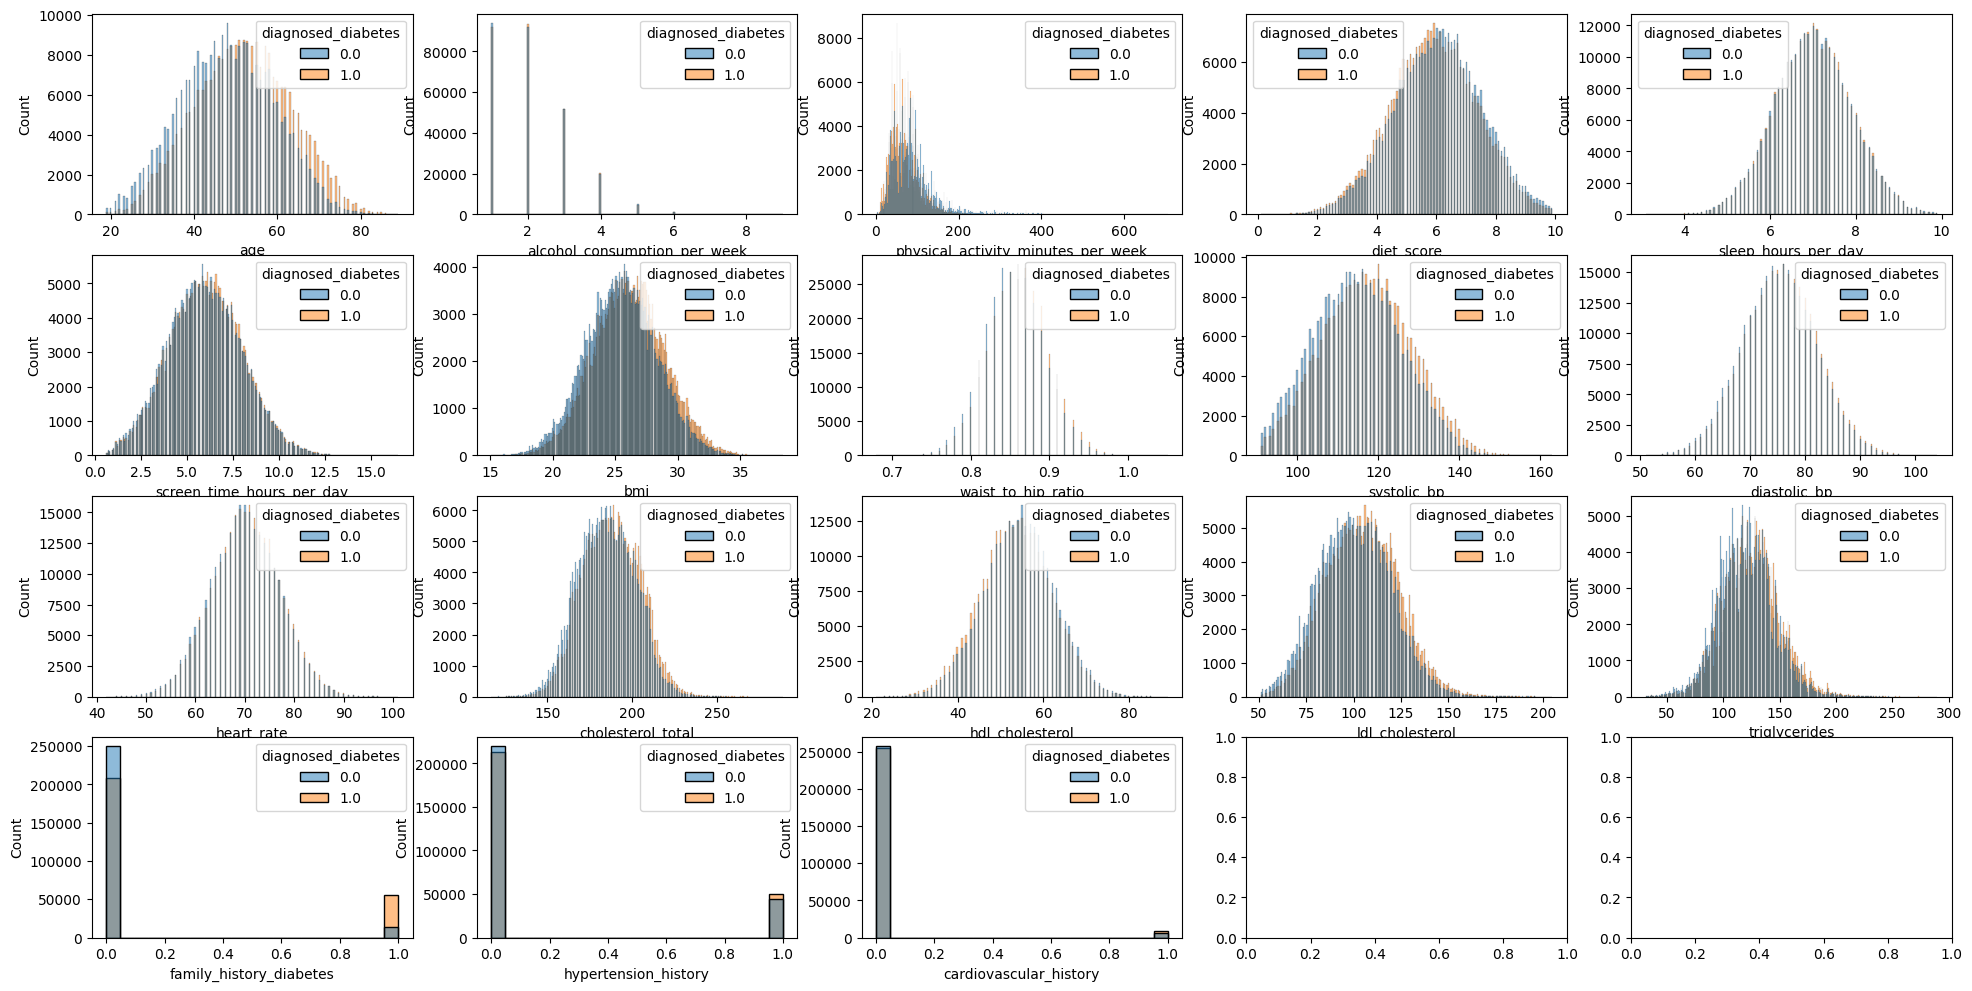

In [10]:
num_cols = data_csv.select_dtypes(include=[np.number]).columns.drop("diagnosed_diabetes")
ncols = len(num_cols)

fig,  axes = plt.subplots(ncols//5 +1, 5, figsize=(24, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < ncols:
        sns.histplot(data = data_csv, x=num_cols[i], hue = 'diagnosed_diabetes', ax=ax)
    # ax.set_title(num_cols[i])

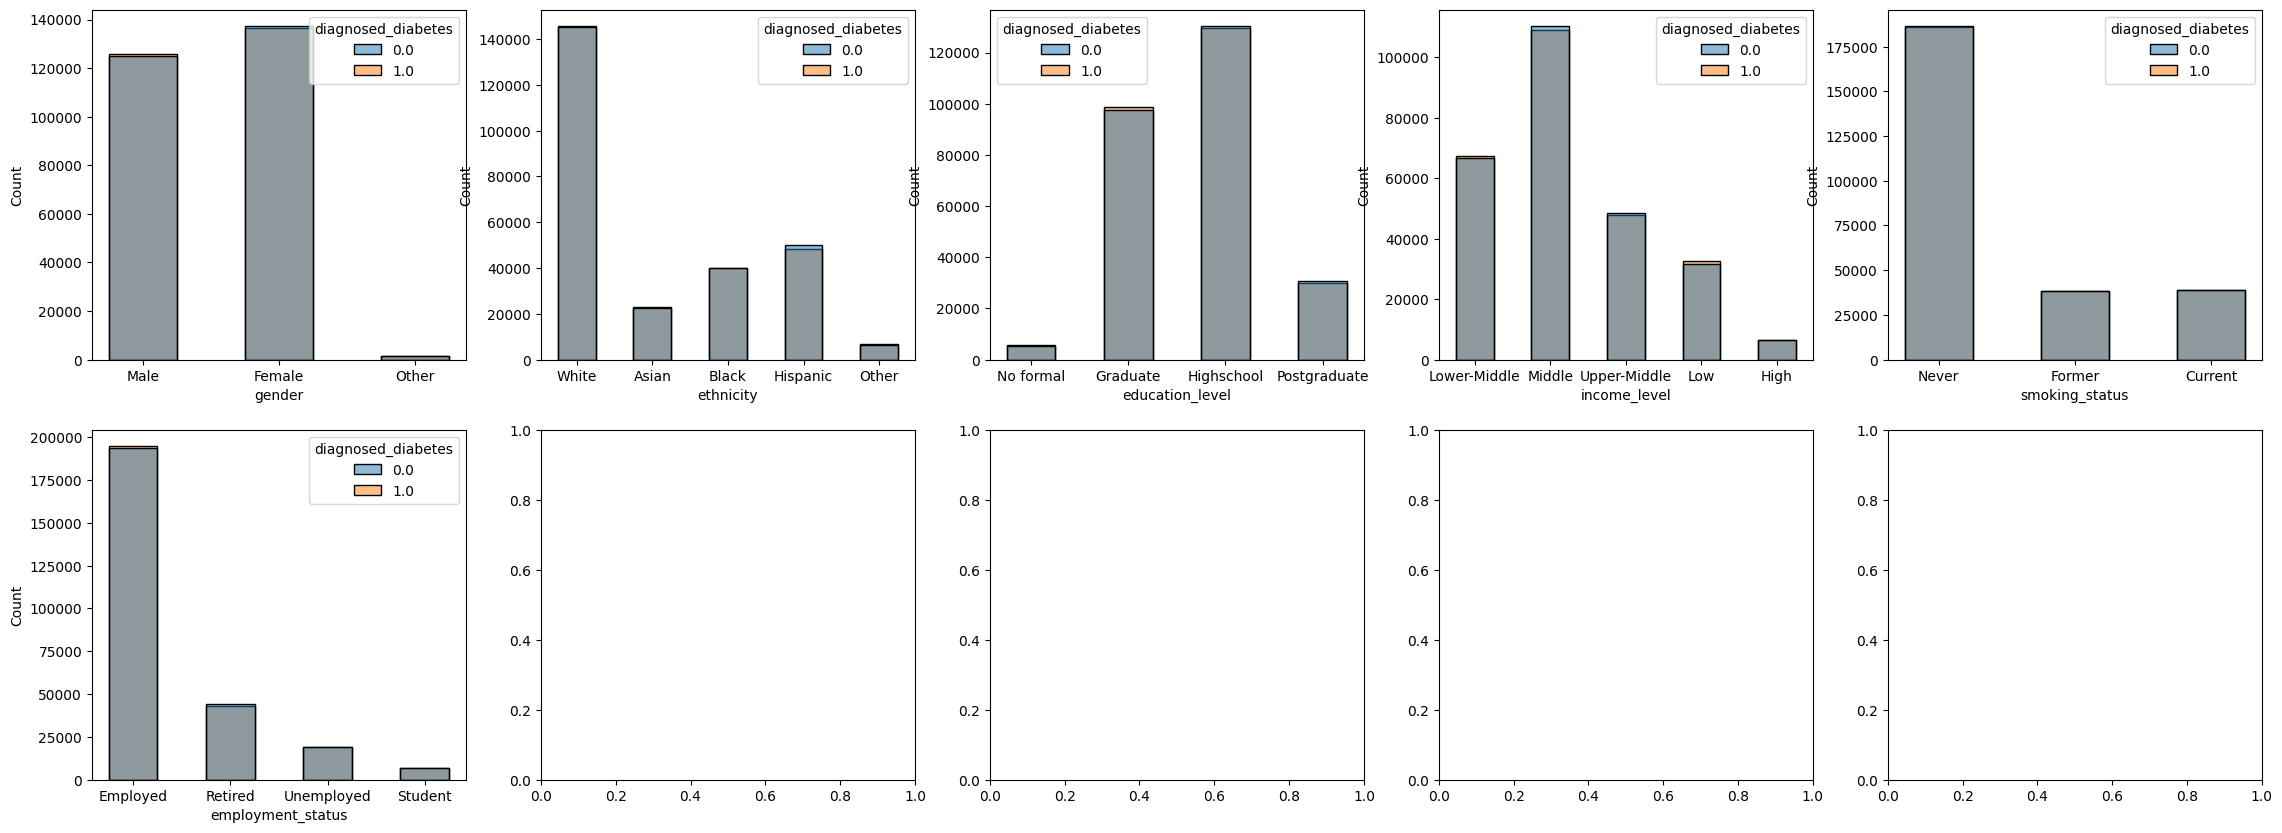

In [13]:
num_cols = data_csv.select_dtypes(include=['object']).columns
ncols = len(num_cols)

fig,  axes = plt.subplots(ncols//5+1, 5, figsize=(28,10))
axes = axes.flatten()
 
for i, ax in enumerate(axes):
    if i < ncols:
        sns.histplot(data = data_csv, x=num_cols[i], hue = 'diagnosed_diabetes', ax=ax, shrink = 0.5) 

In [14]:
# fig, axes = plt.subplots(1,4, figsize=(12, 3))
# axes = axes.flatten()
# sns.histplot(data = data_csv, x='bmi', hue = 'diagnosed_diabetes', ax=axes[0])
# sns.histplot(data = data_csv, x='age', hue = 'diagnosed_diabetes', ax=axes[1])
# sns.histplot(data = data_csv, x='physical_activity_minutes_per_week', hue = 'diagnosed_diabetes', ax=axes[2])
# sns.histplot(data = data_csv, x='cholesterol_total', hue = 'diagnosed_diabetes', ax=axes[3])



<Axes: >

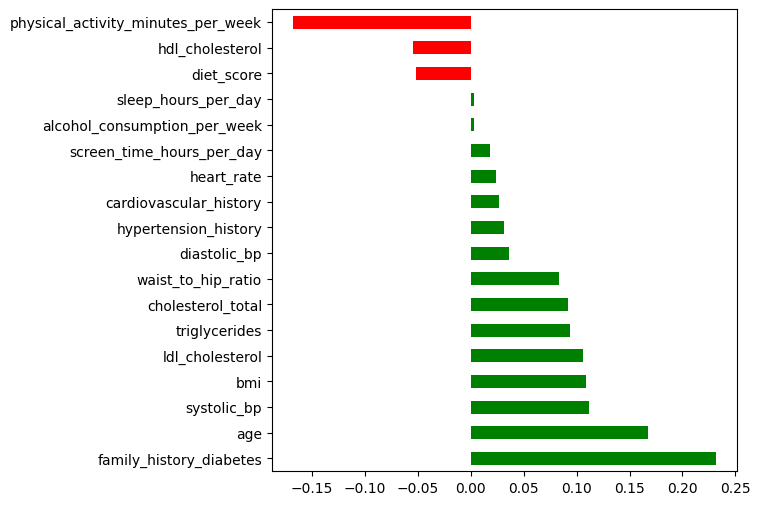

In [15]:
numerical_data = data_csv.select_dtypes(include=[np.number])
numerical_data = numerical_data

# cholesterol_total = numerical_data['cholesterol_total']
# hdl_cholesterol = numerical_data['hdl_cholesterol']
# numerical_data['cholesterol_ratio'] = cholesterol_total / hdl_cholesterol

# systolic_bp = numerical_data['systolic_bp']
# diastolic_bp = numerical_data['diastolic_bp'] 
# numerical_data['pulse_pressure'] = systolic_bp - diastolic_bp

fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = numerical_data.corr()
diabetes_corr = corr_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(ascending=False)

colors = ['green' if x > 0 else 'red' for x in diabetes_corr]
diabetes_corr.plot(kind='barh', color=colors, figsize=(6, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [49]:
standard_data['risk_score'] = (
    (standard_data['bmi'] < 40).astype(int) +
    (standard_data['age'] > 60).astype(int) +
    (standard_data['family_history_diabetes'] == 1).astype(int) +
    (standard_data['physical_activity_minutes_per_week'] < 180).astype(int) +
    # (df['hdl_cholesterol'] < 40).astype(int)
    (standard_data['cholesterol_total'] < standard_data['cholesterol_total'].mean()).astype(int)
)

standard_data['risk_score'].corr(standard_data['diagnosed_diabetes'])


np.float64(0.16166560261746873)

In [20]:
data_csv.loc[outliers]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
566746,45,2,87,4.6,7.1,6.7,17.5,0.71,96,67,...,Female,White,Postgraduate,Low,Former,Employed,0,0,0,1.0
327322,27,1,93,9.0,7.5,9.7,15.9,0.69,95,52,...,Male,White,Postgraduate,Middle,Never,Employed,0,0,0,1.0
108995,58,2,74,5.6,6.2,10.1,15.2,0.70,103,76,...,Male,White,Highschool,Upper-Middle,Current,Retired,1,0,0,1.0
360767,55,2,37,7.8,6.1,3.8,19.0,0.71,112,67,...,Male,Black,Highschool,Middle,Never,Employed,0,0,1,1.0
633796,28,1,30,7.6,5.4,8.7,15.5,0.69,98,69,...,Male,White,Highschool,Middle,Never,Employed,0,0,0,1.0
69876,51,1,45,7.0,5.5,3.8,17.8,0.71,115,79,...,Female,Black,Highschool,Low,Never,Employed,0,0,0,1.0
341024,34,4,132,7.8,7.0,8.1,15.6,0.69,96,74,...,Male,Black,Postgraduate,Middle,Never,Employed,0,0,0,1.0
483785,54,3,70,4.8,7.6,4.6,18.0,0.71,115,83,...,Female,White,Graduate,Lower-Middle,Never,Employed,1,0,0,1.0
600648,27,1,45,5.2,8.0,5.8,18.5,0.71,98,71,...,Female,White,Graduate,Upper-Middle,Never,Employed,0,0,0,1.0
429947,64,1,252,6.6,8.3,7.5,20.0,0.71,117,67,...,Female,White,Highschool,Low,Current,Employed,0,0,0,1.0


In [22]:
data_csv.drop(outliers)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
689897,55,1,45,4.7,5.5,9.6,30.0,0.89,128,74,...,Male,White,No formal,Lower-Middle,Never,Employed,0,0,0,1.0
150304,39,4,57,3.4,8.3,1.1,22.0,0.78,108,66,...,Male,White,Graduate,Middle,Never,Employed,1,0,0,1.0
117984,74,3,40,4.1,6.2,8.7,22.9,0.81,117,80,...,Female,Asian,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0
501783,42,2,17,5.3,6.0,4.0,25.6,0.82,114,76,...,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,1.0
557018,49,1,66,7.7,5.4,3.1,27.2,0.89,133,79,...,Female,Black,Highschool,Middle,Former,Unemployed,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699987,55,2,124,5.9,7.5,7.0,26.1,0.84,117,75,...,Female,Black,Highschool,Middle,Former,Employed,0,0,0,0.0
699988,30,1,76,7.0,7.1,10.6,19.6,0.78,99,75,...,Female,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0
699990,40,3,79,5.6,6.7,8.4,25.5,0.82,128,76,...,Male,Black,Graduate,Upper-Middle,Current,Retired,0,0,0,0.0
699992,39,1,33,9.0,7.0,4.2,25.6,0.86,118,77,...,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0


feature: age, outliers: 0
feature: alcohol_consumption_per_week, outliers: 3
feature: physical_activity_minutes_per_week, outliers: 51
feature: diet_score, outliers: 32
feature: sleep_hours_per_day, outliers: 23
feature: screen_time_hours_per_day, outliers: 32
feature: bmi, outliers: 57
feature: waist_to_hip_ratio, outliers: 46
feature: systolic_bp, outliers: 29
feature: diastolic_bp, outliers: 37
feature: heart_rate, outliers: 46
feature: cholesterol_total, outliers: 61
feature: hdl_cholesterol, outliers: 47
feature: ldl_cholesterol, outliers: 29
feature: triglycerides, outliers: 57
feature: family_history_diabetes, outliers: 0
feature: hypertension_history, outliers: 0
feature: cardiovascular_history, outliers: 0


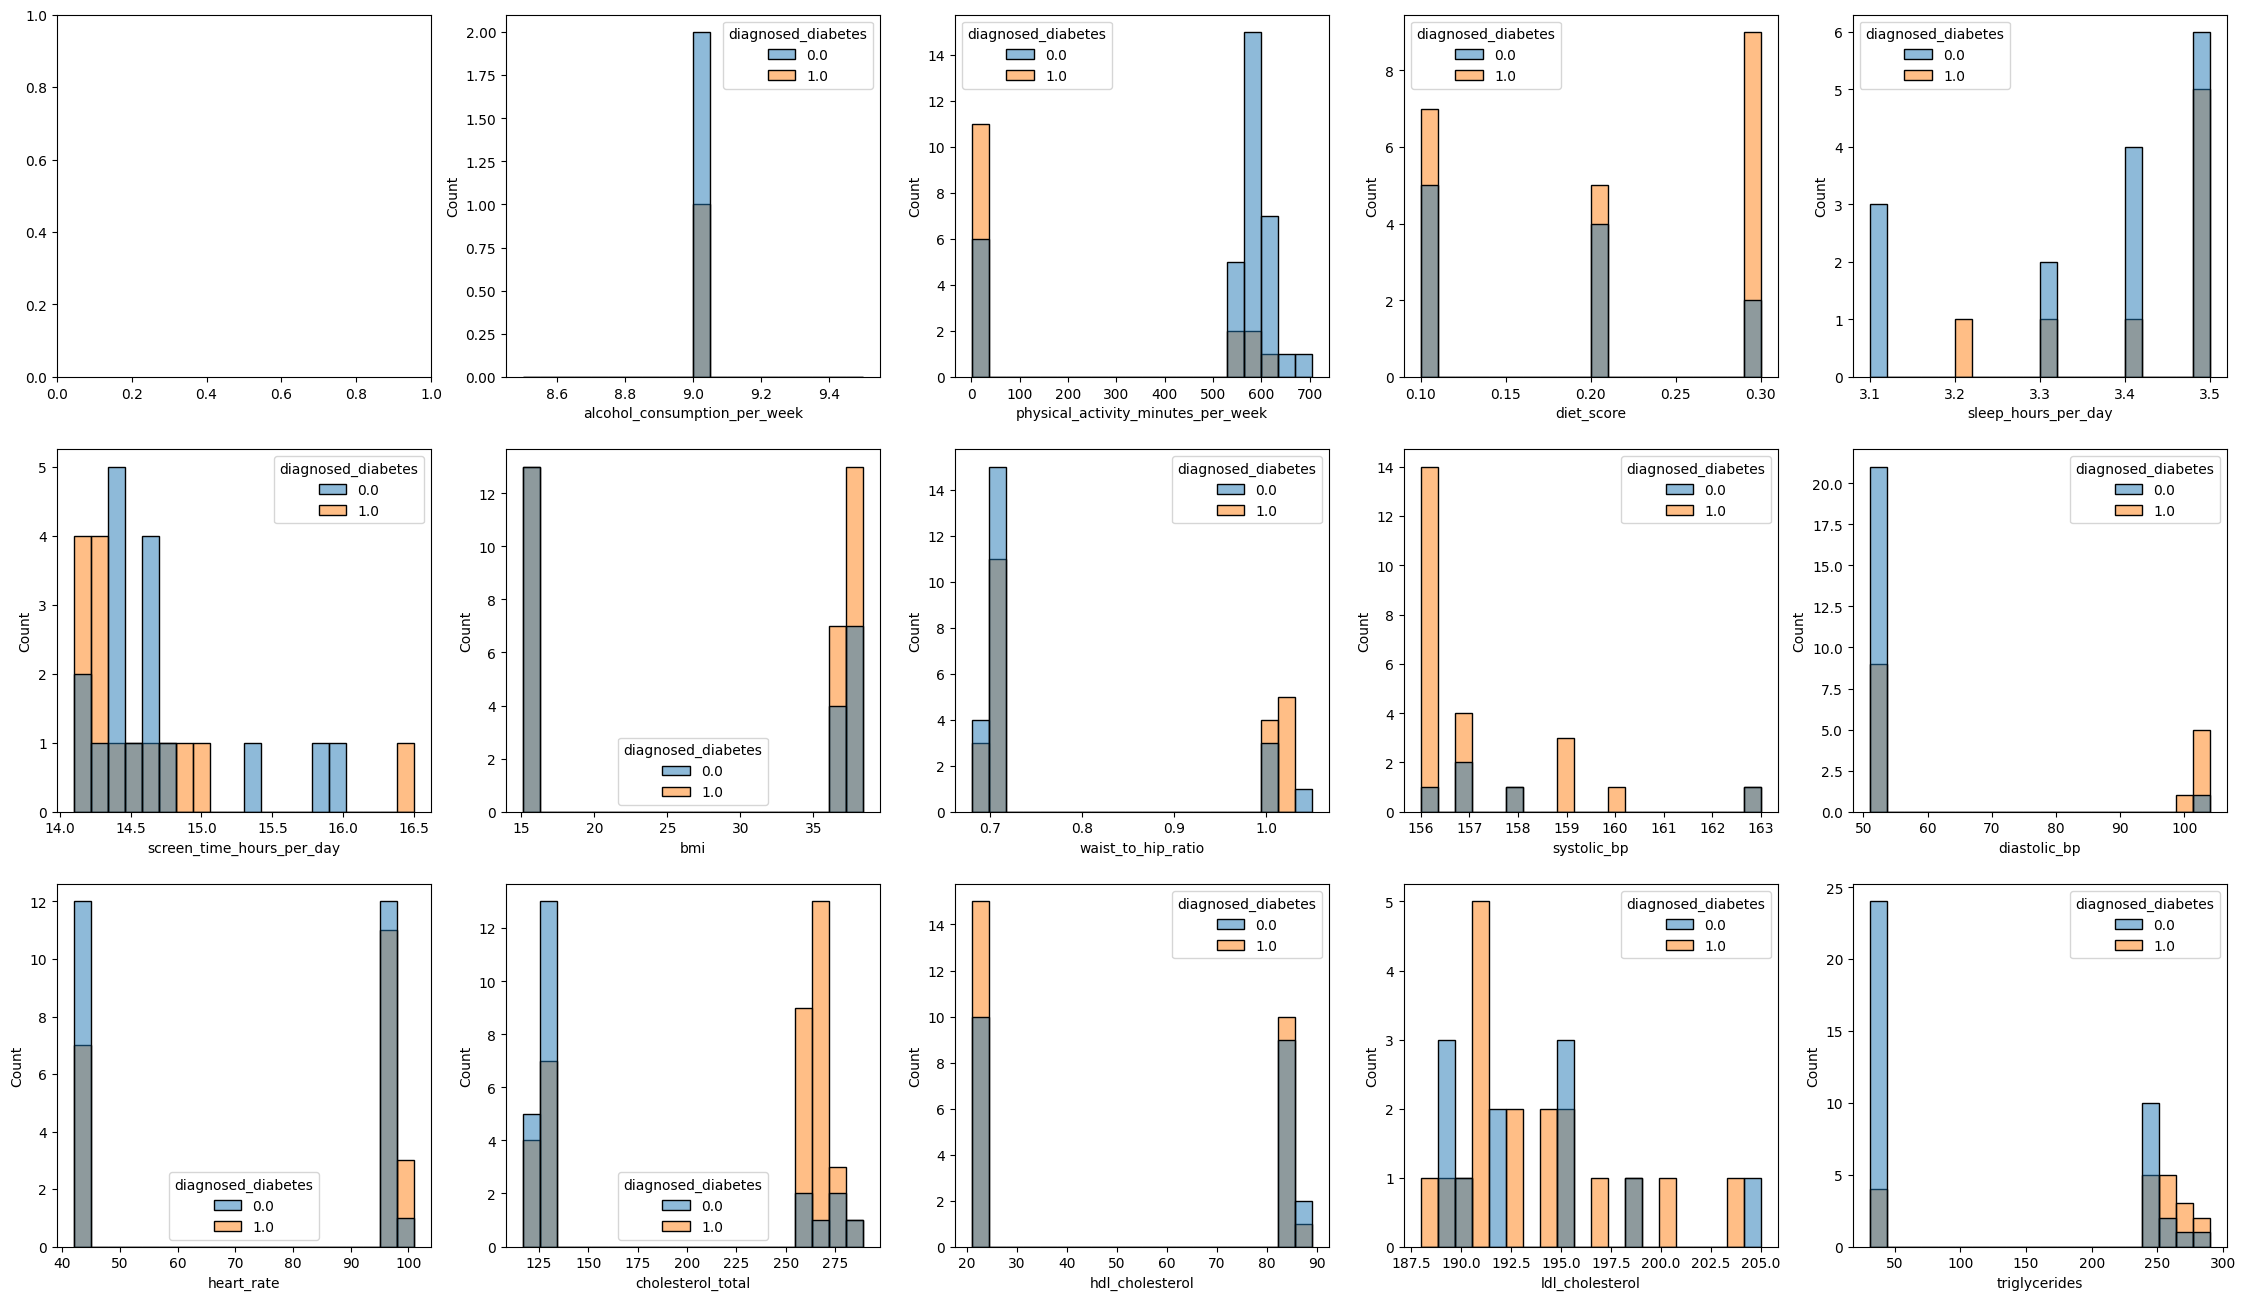

In [29]:
high_q = 0.999936657516334
low_q  = 1 - high_q

ncols = data_csv.select_dtypes(include=[np.number]).columns.drop("diagnosed_diabetes")

fig, axes = plt.subplots(len(ncols)//5 , 5, figsize=(28,16))
axes = axes.flatten() 

outliner_data = pd.DataFrame()
standard_data = data_csv.copy()

for i, col in enumerate(ncols): 
    q_low  = data_csv[col].quantile(low_q)
    q_high = data_csv[col].quantile(high_q)
    outliers = list(data_csv[data_csv[col] < q_low].index) + list(data_csv[data_csv[col] > q_high].index)
    print(f"feature: {col}, outliers: {len(outliers)}")
 
    if len(outliers) > 0:
        outliner_data = pd.concat([outliner_data, data_csv.loc[outliers]]) 
        standard_data = standard_data.drop(outliers, errors="ignore")
        sns.histplot(data_csv.loc[outliers], x=col, hue = 'diagnosed_diabetes', ax=axes[i], bins = 20)

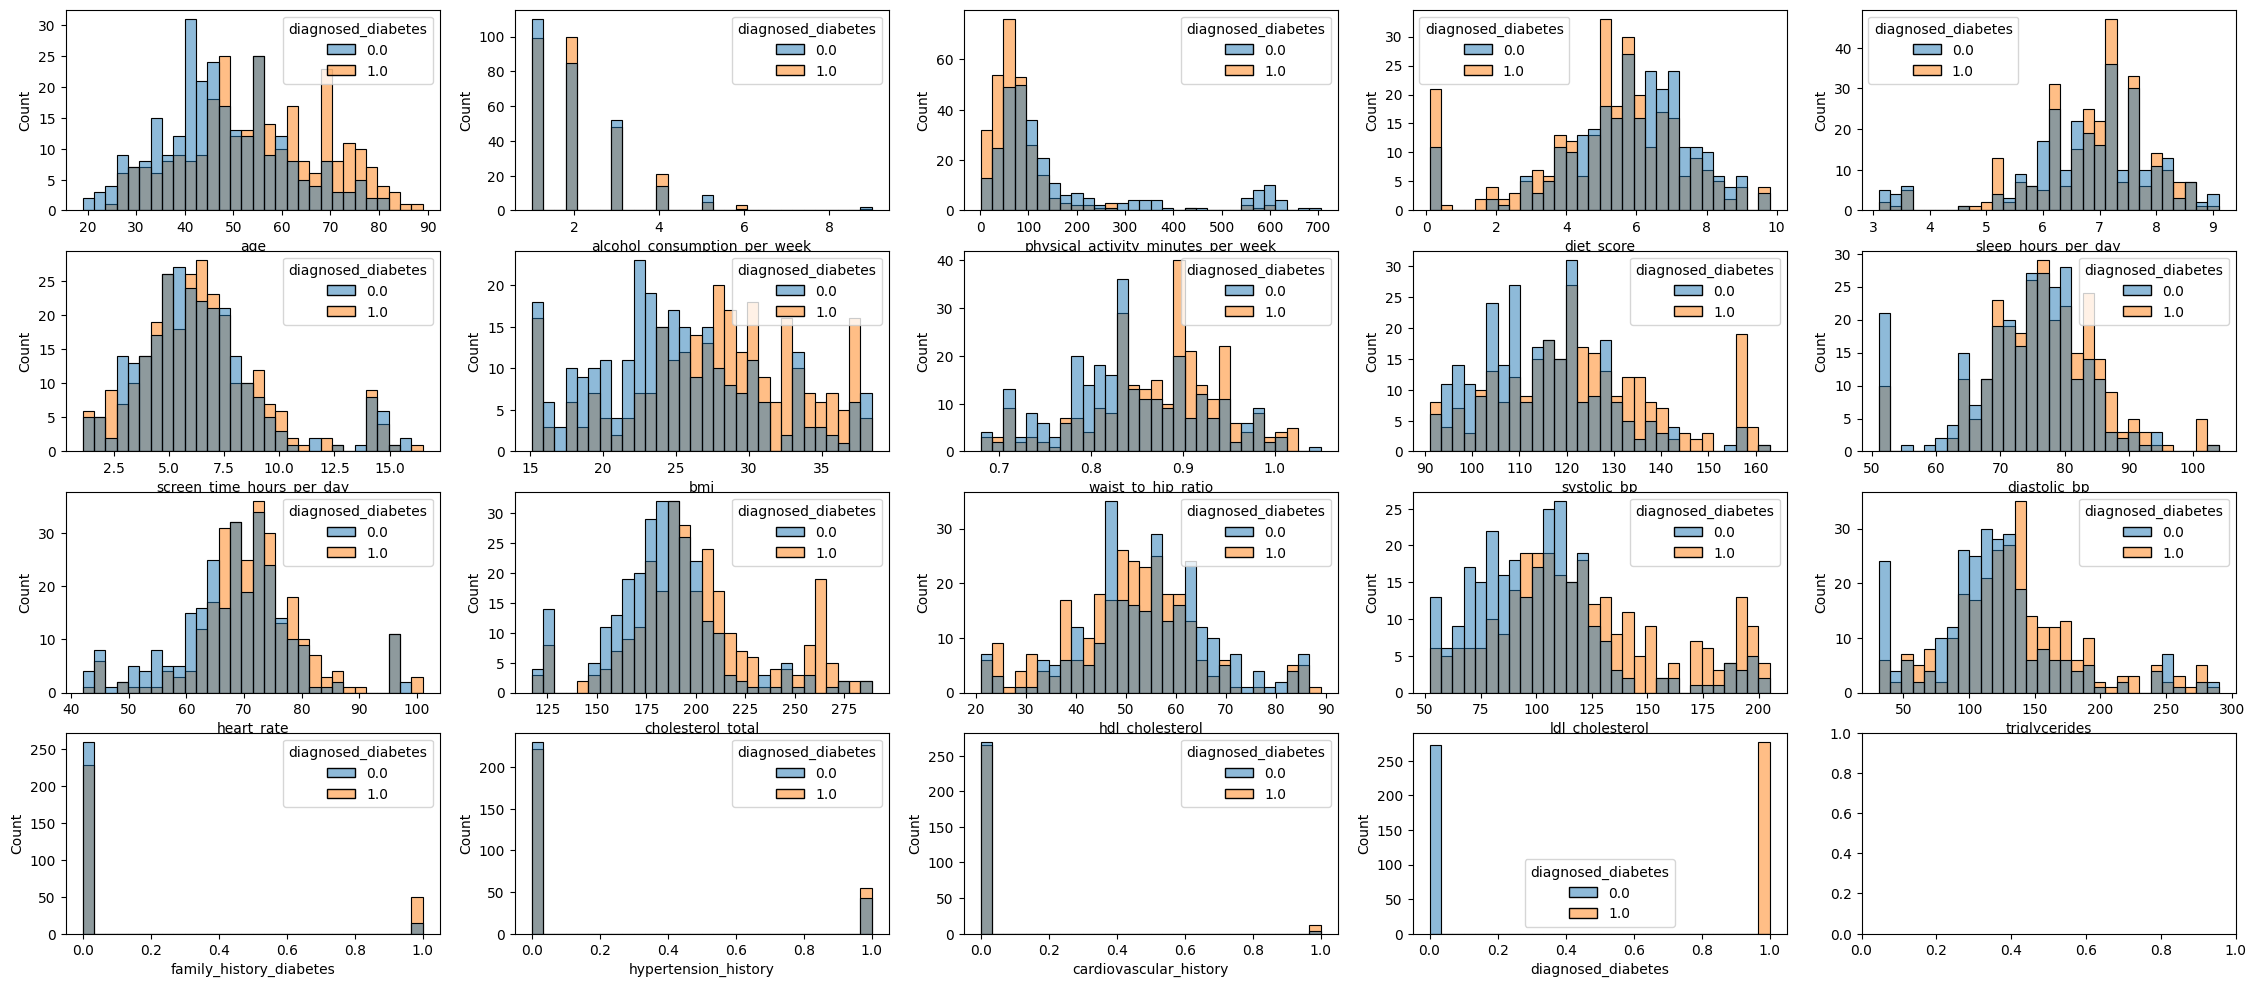

In [34]:
ncols = data_csv.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(ncols)//5 +1, 5, figsize=(28,12))
axes = axes.flatten() 

for i, col in enumerate(ncols) :
    sns.histplot(outliner_data, x=col, hue = 'diagnosed_diabetes', ax=axes[i], bins = 30)


In [88]:
data_csv['alcohol_consumption_per_week'].loc[outliers]

127750    9
595137    9
Name: alcohol_consumption_per_week, dtype: int64

In [ ]:
data_csv = data_csv.drop(outliers[:50], errors="ignore")

In [ ]:
 
features_csv = standard_data

""" adding features """

features_csv['bmi_age'] = features_csv['bmi'] * features_csv['age']
features_csv['bmi_bp']  = features_csv['bmi'] * features_csv['diastolic_bp']

features_csv['bmi_age_ratio'] = features_csv['bmi'] / (1 +features_csv['age'])





In [ ]:
numerical_data['risk'] = ( 
    (numerical_data['age'] > 45 ).astype(int) + 
    (numerical_data['bmi'] > numerical_data['bmi'].median() ).astype(int) + 
    # (numerical_data['family_history_diabetes'] >0 ).astype(int) + 
    # (numerical_data['systolic_bp'] > numerical_data['systolic_bp'].median()).astype(int) + 
    (numerical_data['physical_activity_minutes_per_week'] < numerical_data['physical_activity_minutes_per_week'].mean() ).astype(int) + 
    (numerical_data['cholesterol_total'] > numerical_data['cholesterol_total'].median()).astype(int) )

numerical_data['risk'].corr(numerical_data['diagnosed_diabetes'])

np.float64(0.18763654746552938)

In [8]:
for cols in data_csv.columns:
    if data_csv[cols].dtype == 'object':
        print('features: ', cols)
        print(np.unique(data_csv[cols]))
        print('-'*10)

# data_csv.describe()

features:  gender
['Female' 'Male' 'Other']
----------
features:  ethnicity
['Asian' 'Black' 'Hispanic' 'Other' 'White']
----------
features:  education_level
['Graduate' 'Highschool' 'No formal' 'Postgraduate']
----------
features:  income_level
['High' 'Low' 'Lower-Middle' 'Middle' 'Upper-Middle']
----------
features:  smoking_status
['Current' 'Former' 'Never']
----------
features:  employment_status
['Employed' 'Retired' 'Student' 'Unemployed']
----------


In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
 
categorical_cols = standard_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols   = standard_data.drop(columns=['diagnosed_diabetes']).select_dtypes(include=['int64', 'float64']).columns.tolist()

inpust_data = data_csv.drop(columns=['diagnosed_diabetes'])
target_data = data_csv['diagnosed_diabetes']
 

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

train_data, valid_data, train_target, valid_target = train_test_split(inpust_data, target_data, test_size=0.2, random_state=8964, stratify = target_data)

 
encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols), 
    ('scaler', StandardScaler(), numerical_cols)], remainder='passthrough')

train_encoded = encoder.fit_transform(train_data); print(train_encoded.shape)
valid_encoded = encoder.transform(valid_data); print(valid_encoded.shape)
 

Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Numerical columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
(421908, 42)
(105478, 42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

log_clf   = LogisticRegression(max_iter=1000)
rf_clf    = RandomForestClassifier(n_estimators=100, max_depth=10)
xgb_clf   = XGBClassifier(n_estimators=200, max_depth=5)
# svc_clf   = SVC()

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf), 
        ('rf', rf_clf),
        ('xgb', xgb_clf) ], voting='soft')
        # ('svc', svc_clf)]

voting_clf.fit(train_encoded, train_target)

for clf in (log_clf, rf_clf, xgb_clf, voting_clf):
    clf.fit(train_encoded, train_target)
    y_pred = clf.predict(valid_encoded)
    print(clf.__class__.__name__, accuracy_score(valid_target, y_pred))

LogisticRegression 0.6399059519520658
RandomForestClassifier 0.6420580595005594
XGBClassifier 0.6631051024858264
VotingClassifier 0.6565824152903923


In [37]:
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'max_depth': [ 5, 7, 10],
    'learning_rate': [ 0.05, 0.1],
    'n_estimators': [200, 400],
    'subsample': [ 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=8964),
    xgb_params,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=8964
)

xgb_search.fit(train_encoded, train_target)
print(f"Best params: {xgb_search.best_params_}")
print(f"Best score: {xgb_search.best_score_:.4f}")

Best params: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best score: 0.6612


In [38]:
y_pred = xgb_search.best_estimator_.predict(valid_encoded)

print('validated accuracy: ', accuracy_score(valid_target, y_pred))


validated accuracy:  0.6626026280361782


In [28]:
print(f"Diabetes prevalence: {train_target.mean():.3f}")

Diabetes prevalence: 0.623


In [31]:
train_target.value_counts()

diagnosed_diabetes
1.0    349046
0.0    210954
Name: count, dtype: int64

In [33]:
211/350

0.6028571428571429

In [ ]:
Do  you have access to  the book "Machine Learning

with Scikit-Learn, Keras & TensorFlow"?  